# S07 T01: Tasca dades, probabilitats i estadístiques

## Descripció:
Aprèn a realitzar estadístiques amb Python.

In [2]:
#Importamos las librerias:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

pd.set_option('display.max_columns', None)

## Nivell 1

### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [3]:
# Utilizaremos el mismo dataset de jugadores de la NBA de la S06_T01: https://www.kaggle.com/justinas/nba-players-data
df = pd.read_csv(r'..\DB\all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [4]:
# Trabajaremos con la columna "age". Calcularemos la media aritmética, la mediana, la moda y la desviación estándar de la edad de los jugadores.
edad = df['age']
edad.head()

0    22.0
1    27.0
2    30.0
3    29.0
4    22.0
Name: age, dtype: float64

In [5]:
# La media aritmética es la suma de todos los valores, dividido entre la cantidad de valores.
print(f'La media aritmética de las edades de los jugadores es de {round(edad.mean(),2)} años')

# La mediana es el valor central 
print(f'El valor central, o mediana, de las edades de los jugadores es de {round(edad.median(),2)} años')

# La moda es el valor más repetido
print(f'El valor más repetido, o la moda, de las edades de los jugadores es {round(edad.mode()[0],2)} años')

# La desviación estándar es la medida de cómo de distribuidos están los valores, se denota con el simbolo griego sigma (σ)
print(f'La desviación estándar, σ, de las edades de los jugadores es de {round(np.std(edad),2)}')

La media aritmética de las edades de los jugadores es de 27.13 años
El valor central, o mediana, de las edades de los jugadores es de 26.0 años
El valor más repetido, o la moda, de las edades de los jugadores es 24.0 años
La desviación estándar, σ, de las edades de los jugadores es de 4.34


### Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [6]:
# Miraremos si hay correlación entre la edad y la altura (en principio no tendría que haberla, por lo que esperamos una correlación baja: más cercana de 0 que de 1)
df[['age', 'player_height']].corr()

,age,player_height
age,1.000000,-0.011678
player_height,-0.011678,1.000000


In [7]:
# Podemos extraer la correlación de otra manera:
corr = round(df['age'].corr(df['player_height']), 4)
print(f'La correlación entre la edad y la altura de los jugadores es {corr}')

# al introducir dentro del corchete, la expresión de la variable corr, me daba error de syntax. Por eso he creado la variable corr.

La correlación entre la edad y la altura de los jugadores es -0.0117


## Nivell 2
### Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [8]:
# Realizaremos un heatmap, pero para ello hay que utilizar únicamente las columnas numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  float64
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

In [9]:
df_num = df[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
df_num.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,213.36,106.59412,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052
1,27.0,210.82,106.59412,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000
2,30.0,208.28,106.59412,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099
3,29.0,210.82,111.13004,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101
4,22.0,205.74,106.59412,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114


In [10]:
# Añadimos seaborn y matplotlib.pyplot a las librerias a importar
correlaciones = df_num.corr() # generamos una tabla con las correlaciones entra cada variable
correlaciones

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.011678,0.052119,0.049585,0.002873,0.031416,0.086853,0.096820,-0.060633,0.014843,-0.127949,0.022131,0.066615
player_height,-0.011678,1.000000,0.827301,-0.005329,-0.060524,0.422356,-0.457367,-0.008723,0.590928,0.615384,-0.109527,0.069618,-0.625888
player_weight,0.052119,0.827301,1.000000,0.012496,-0.030655,0.437403,-0.387343,0.000612,0.604062,0.607750,-0.071879,0.062474,-0.540902
gp,0.049585,-0.005329,0.012496,1.000000,0.538367,0.468870,0.385596,0.254051,-0.020495,0.060785,0.138849,0.377679,0.134810
pts,0.002873,-0.060524,-0.030655,0.538367,1.000000,0.622818,0.656564,0.221002,-0.124345,0.050246,0.638037,0.378961,0.330269
reb,0.031416,0.422356,0.437403,0.468870,0.622818,1.000000,0.231678,0.193027,0.410619,0.611215,0.225592,0.312843,-0.078836
ast,0.086853,-0.457367,-0.387343,0.385596,0.656564,0.231678,1.000000,0.167207,-0.346569,-0.207846,0.387400,0.177817,0.806682
net_rating,0.096820,-0.008723,0.000612,0.254051,0.221002,0.193027,0.167207,1.000000,0.056778,0.043275,0.000476,0.318076,0.061723
oreb_pct,-0.060633,0.590928,0.604062,-0.020495,-0.124345,0.410619,-0.346569,0.056778,1.000000,0.557682,-0.101293,0.058805,-0.438385
dreb_pct,0.014843,0.615384,0.607750,0.060785,0.050246,0.611215,-0.207846,0.043275,0.557682,1.000000,-0.021448,0.102571,-0.338098


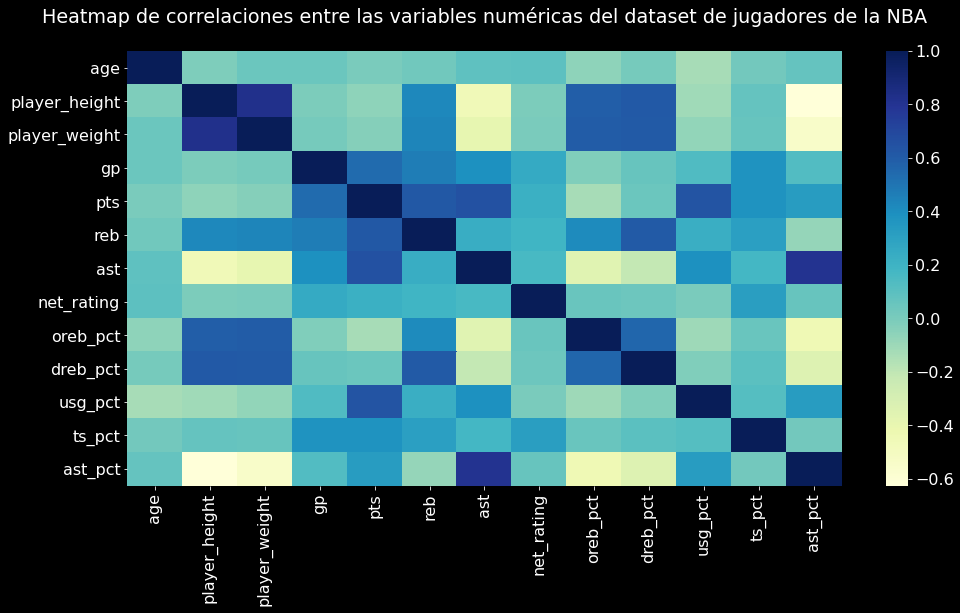

In [11]:
# Creamos un heatmap con sns e imprimimos con plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (16, 8)}) # set font and plot size to be larger
sns.heatmap(correlaciones, cmap="YlGnBu")
plt.title('Heatmap de correlaciones entre las variables numéricas del dataset de jugadores de la NBA\n')
plt.show()

Podemos observar que existe cierta correlación positiva entre peso y altura de los jugadores, lo cual tiene sentido. Otra correlación positiva que observamos relacionada con la altura y el peso, es la que tiene que ver con el porcentage de rebotes ofensivos (oreb_pct) y defensivos (dreb_pct): es lógico que aquellos jugadores más altos cojan más rebotes que los más bajos.

Además, podemos observar también cierta correlación positiva entre partidos jugados (gp) y puntos anotados (pts), rebotes (reb) y asistencias (ast). Por último, otras variables con una alta correlación positiva son las de asistencias (ast) y porcentaje de puntos de compañeros de equipo a los que el jugador le ha hecho asistencia (ast_pct). Podemos observar que aquellos jugadores menos altos, pesan menos, realizan más asistencias (correlación negativa) y cogen menos rebotes.


## Nivell 3
### Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [12]:
# De la documentación de python de statistics: https://docs.python.org/3.8/library/statistics.html#statistics.geometric_mean
# La media geométrica indica el valor típico utilizando el producto de los valores
# La media armónica es el inverso de la media aritmética
# Para su cálculo, importamos el módulo statistics de python (lo añado a la celda de importaciones)
media_geo = round(statistics.geometric_mean(edad), 2)
media_arm = round(statistics.harmonic_mean(edad), 2)

print(f'La media geométrica de las edades es {media_geo} años y la media armónica es {media_arm} años')

La media geométrica de las edades es 26.8 años y la media armónica es 26.47 años
